# Stackoverflow 2023 analysis




## Business understanding

The IT industry's growth makes exploring both traditional college paths and alternative entry points insightful. Here are some key questions to investigate developer demographics and career trajectories:
1. How is developer income distributed across the field?
2. What range of educational backgrounds do developers possess?
3. In which countries do we find a high concentration of experienced developers?


## Data understanding

This analysis leverages data from Stack Overflow's 2023 Developer Survey. The survey garnered responses from a global audience, with participants from over 200 countries. This notebook focuses on questions within the survey pertaining to remote work arrangements. By analyzing these responses, we aim to address the three key questions outlined in the Business Understanding section.

**Helper function to draw diagrams**

### Import libraries and load data from csv files.
- Import Python libraries
- Load stackoverflow public dataset with its schema

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [3]:
df = pd.read_csv("data/survey_results_public.csv")

In [4]:
schema = pd.read_csv("data/survey_results_schema.csv")

In [5]:
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


**Number of columns**

In [6]:
df.columns.size

84

In [7]:
print(df.columns)

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

**Column overview**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [9]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


**Top 10 columns which have the most missing values**

In [10]:
missing_df = df.isnull().sum()

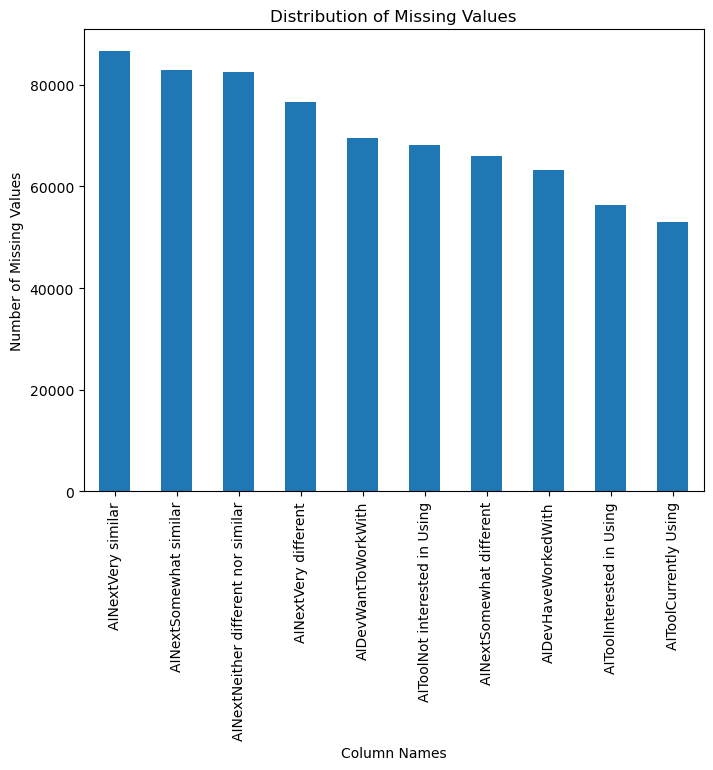

In [11]:
plt.figure(figsize=(8, 6))
missing_df.sort_values(ascending=False)[0:10].plot(kind="bar")
plt.xlabel('Column Names')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing Values')
plt.show()

### 1. How is developer income distributed across the field?

#### Data preparation

For this question, I will use the `CompTotal` column to analyze the distribution. Due to the wide range and significant gaps between the income values, I will scale the numbers down using the base-10 logarithm.

**Schema** of column `CompTotal`

In [12]:
HTML(schema[schema["qname"] == "CompTotal"]["question"].values[0])

In [132]:
def clean_comp_total(df: pd.DataFrame):
    '''
    Clean data in comp_total column and return the cleaned data
    Cleaning steps:
        - Remove nan and zero values
        - Scale income values by log of 10
        - count number of occurences of income
        - sort by income value

    input: 
        df: Dataframe which contains CompTotal column
    output: 
        cleaned CompTotal series 
    '''

    comp_total = df["CompTotal"].dropna()
    comp_total = comp_total[comp_total != 0]

    comp_total = np.log10(comp_total).astype(int)

    comp_dist = comp_total.value_counts().sort_index()

    return comp_dist

In [133]:
comp_dist = clean_comp_total(df=df)

#### Visualize result for question

**Distribution of user compensation (scaled by log)**

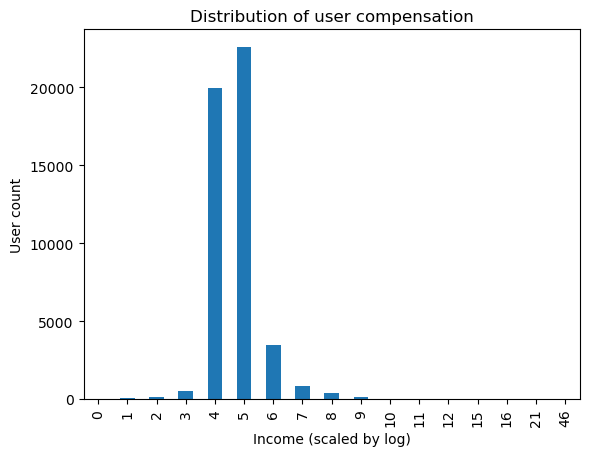

In [16]:
comp_dist.plot(kind="bar")
plt.xlabel('Income (scaled by log)')
plt.ylabel('User count')
plt.title('Distribution of user compensation')
plt.show()

In the survey, user incomes range widely, from as low as 10 to as high as 10e46 dollars. However, according to the distribution diagram, the most common user incomes are typically around 10e4 to 10e5 dollars.

### 2. What range of educational backgrounds do developers possess?

#### Data preparation

As there exists a column `EdLevel` which contains the user education and data in that column are already categorical, there nothing needed to prepare

**Schema** of column `EdLevel`

In [18]:
HTML(schema[schema["qname"] == "EdLevel"]["question"].values[0])

Create a list of education level types along with their percent in the `EdLevel` column.

In [21]:
edlevel_percent = df["EdLevel"].value_counts(normalize=True)

#### Visualize result for question

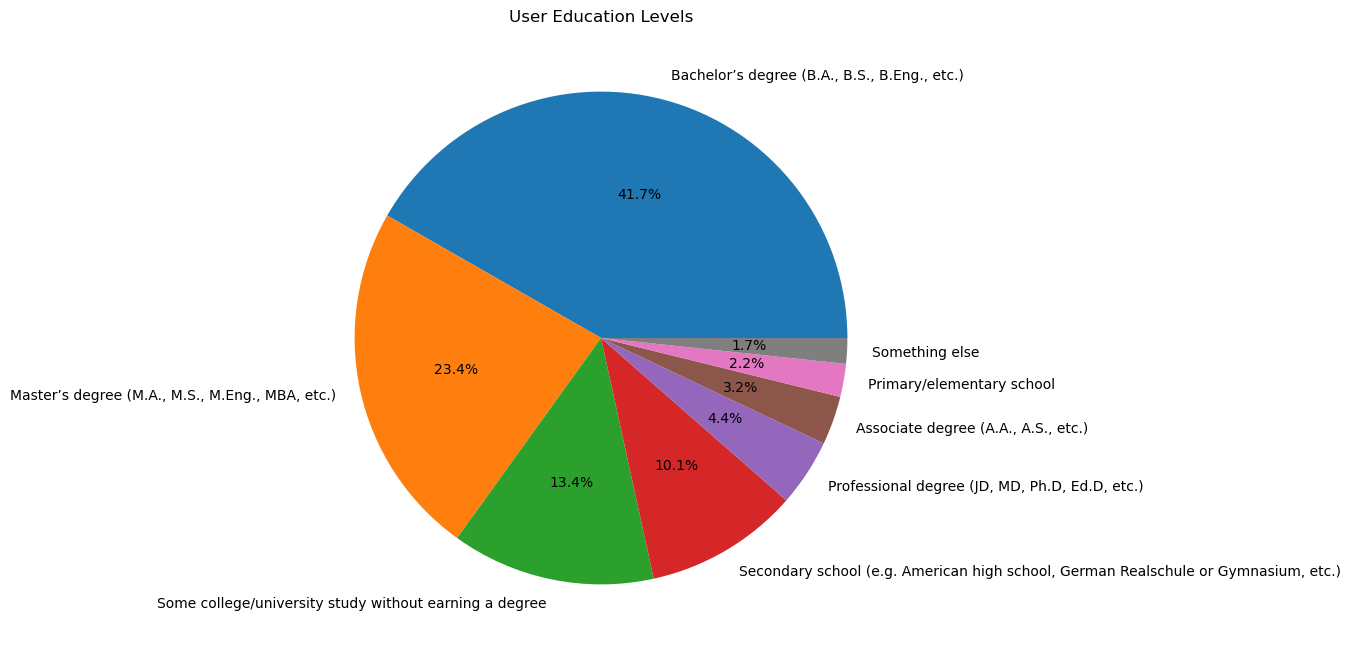

In [24]:
edlevel_percent.plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), title='User Education Levels')
plt.ylabel('') 
plt.show()

A large number of users in our survey have a Bachelor's degree. Additionally, a significant portion of respondents do not have a degree: 
- 13.4% have `Some college/university study without earning a degree` 
- 10.1% have `only a secondary school education`

This indicates that the field is still accessible to individuals without a formal degree.

### 3. In which countries do we find a high concentration of experienced developers?

#### Data preparation

**Columns to be used**
* YearsCodePro
* Country

To answer this question we will group users based on their years of experience and create a pie chart to see the propotion of countries who have the highest exprienced developers.

**Schema** of column `YearsCodePro`

In [27]:
HTML(schema[schema["qname"] == "YearsCodePro"]["question"].values[0])

**Schema** of column `Country`

In [131]:
HTML(schema[schema["qname"] == "Country"]["question"].values[0])

**Number of NaN values**

In [44]:
df["YearsCodePro"].isnull().sum()

23048

**Group integer values into numbers**

In [45]:
yoe = df["YearsCodePro"].dropna()
yoe_int = pd.to_numeric(yoe, errors="coerce")

In [78]:
bins = [0, 2, 5, 10, np.inf]
labels = ['1-2 years', '2-5 years', '5-10 years', 'Above 10 years']

# Group numeric values into bins and count occurrences
yoe_int_splitted = pd.cut(yoe_int, bins=bins, labels=labels, right=False).astype(str)

# nan index after transforming to integer
nan_idx = yoe[yoe_int.isna()].index

In [74]:
index_order = [ 'Less than 1 year', '1-2 years','2-5 years','5-10 years','Above 10 years', 'More than 50 years']

In [86]:
yoe_int_splitted.loc[nan_idx] = yoe[nan_idx]

**Distribution of users' year of coding**

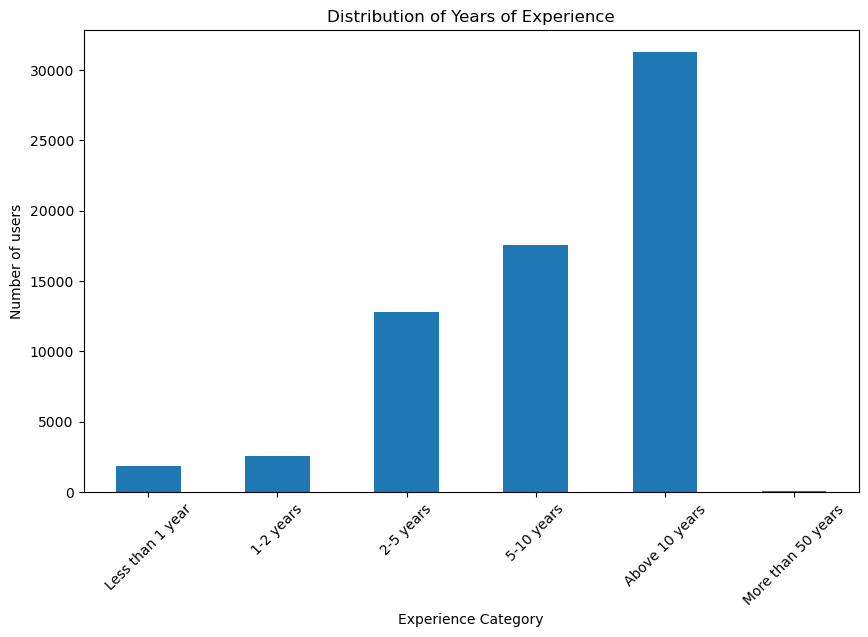

In [87]:
plt.figure(figsize=(10, 6))
yoe_int_splitted.value_counts().reindex(index_order).plot(kind="bar")
plt.xlabel('Experience Category')
plt.ylabel('Number of users')
plt.title('Distribution of Years of Experience')
plt.xticks(rotation=45)
plt.show()

**Number of users who have 'more than 50 years' of experience**

In [88]:
(yoe_int_splitted == "More than 50 years").sum()

83

The majority of users in the survey have been in the industry for 5-10 years and above 10 years. Conversely, the number of users with more than 50 years of experience is considerably low, with only 83 individuals. Let's focus on users with over 5 years of experience and explore which countries have the highest proportion of such individuals.

In [81]:
high_yoe_idx = yoe_int_splitted[yoe_int_splitted.isin(["5-10 years", "Above 10 years", "More than 50 years"])].index

In [92]:
high_yoe_idx.size

48809

**Count countries of high experienced users**

In [121]:
country_count = df.loc[high_yoe_idx]["Country"].value_counts(normalize=True).sort_values(ascending=False)

**Only keep the top 10 highest countries and mark the other as 'Other'**

In [123]:
country_count_filterd = country_count[:10].copy()
country_count_filterd["Other"] = country_count[10:].sum()

#### Visualize result for question

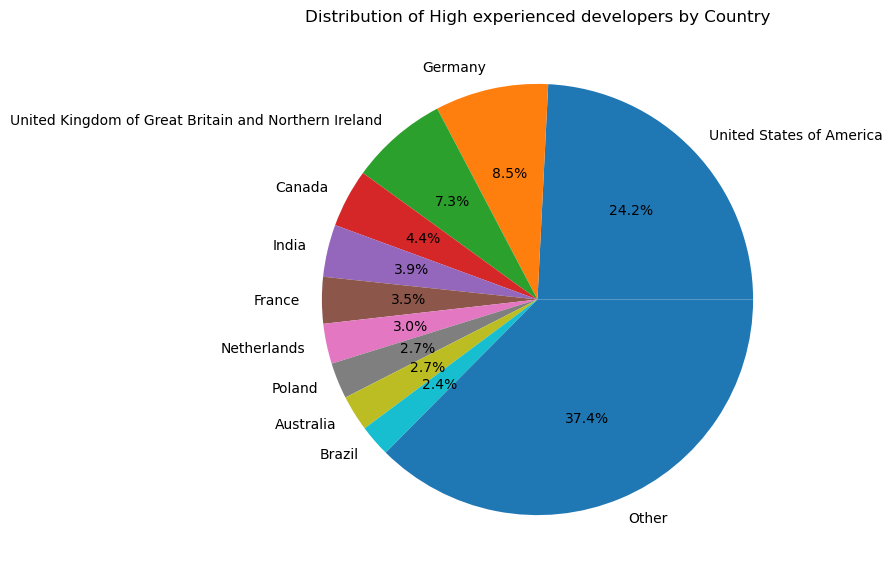

In [130]:
plt.figure(figsize=(10, 7))
country_count_filterd.plot(kind="pie", autopct='%1.1f%%')
plt.title('Distribution of High experienced developers by Country')
plt.ylabel('')  # Hide the y-label
plt.show()

As illustrated in the pie chart, a significant proportion of high-experience users tend to come from the USA or EU. This trend could be attributed to the fact that users who participated in the survey predominantly hail from these regions. It's worth noting that large IT markets such as China are not represented in this pie chart. This absence may be due to lower survey participation rates in these regions, language barriers, or different platforms being used in those markets. Additionally, the prominence of the USA and EU in this chart could reflect their mature IT industries and the higher visibility of their professionals in international surveys.